rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64
Empty DataFrame
Columns: [rownumber, customerid, surname, creditscore, geography, gender, age, tenure, balance, numofproducts, hascrcard, isactivemember, estimatedsalary, exited]
Index: []
Logistic Regression Train Score: 0.6815152578042792
Logistic Regression Test Score: 0.7023712183156173
Precision: 0.6798029556650246
Recall: 0.7101200686106347
Accuracy: 0.7023712183156173
F1 Score: 0.6946308724832215
Logistic Regression CV Train Score: 0.6948439144159944
Logistic Regression CV Test Score: 0.695829926410466
KNN Train Score: 0.8439144159943879
KNN Test Score: 0.7195421095666394
KNN Precision: 0.7061855670103093
KNN Recall: 0.7049742710120068
KNN Accuracy: 0.7195421095666394
KNN F1 Sc

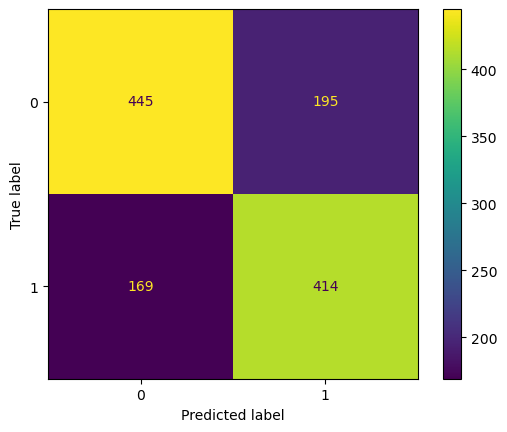

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, recall_score, precision_score, 
                             accuracy_score, f1_score, ConfusionMatrixDisplay)
from sklearn.svm import SVC
churn = pd.read_csv('Churn_Modelling.csv')
churn.columns = churn.columns.str.strip().str.lower()
print(churn.isna().sum())
print(churn[churn.duplicated(subset=['customerid'], keep=False)])
churn_majority = churn[churn['exited'] == 0]
churn_minority = churn[churn['exited'] == 1]
churn_majority_downsample = resample(churn_majority, n_samples=2037, replace=False, random_state=42)
churn_df = pd.concat([churn_majority_downsample, churn_minority])
churn_df.drop(['rownumber', 'customerid', 'surname', 'geography', 'gender'], axis=1, inplace=True)
x = churn_df.drop(['exited'], axis=1)
y = churn_df['exited']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
lr = LogisticRegression(max_iter=1000)  # Increased max_iter
lr.fit(x_train, y_train)
print(f"Logistic Regression Train Score: {lr.score(x_train, y_train)}")
print(f"Logistic Regression Test Score: {lr.score(x_test, y_test)}")
y_pred = lr.predict(x_test)
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Confusion Matrix
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=lr.classes_), display_labels=lr.classes_)
cmd.plot()
lr_cv = LogisticRegressionCV(max_iter=1000, solver='liblinear', penalty='l1', cv=3)
lr_cv.fit(x_train, y_train)
print(f"Logistic Regression CV Train Score: {lr_cv.score(x_train, y_train)}")
print(f"Logistic Regression CV Test Score: {lr_cv.score(x_test, y_test)}")
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)
print(f"KNN Train Score: {knn.score(x_train, y_train)}")
print(f"KNN Test Score: {knn.score(x_test, y_test)}")
y_pred_knn = knn.predict(x_test)
print(f"KNN Precision: {precision_score(y_test, y_pred_knn)}")
print(f"KNN Recall: {recall_score(y_test, y_pred_knn)}")
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"KNN F1 Score: {f1_score(y_test, y_pred_knn)}")
svc = SVC(kernel='rbf', gamma=2, C=1)
svc.fit(x_train, y_train)
print(f"SVC Train Score: {svc.score(x_train, y_train)}")
print(f"SVC Test Score: {svc.score(x_test, y_test)}")
y_pred_svc = svc.predict(x_test)
print(f"SVC Precision: {precision_score(y_test, y_pred_svc)}")
print(f"SVC Recall: {recall_score(y_test, y_pred_svc)}")
print(f"SVC Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(f"SVC F1 Score: {f1_score(y_test, y_pred_svc)}")
